# Valores Iniciales Optimistas

Se importan módulos para controlar el entorno `SnakeEnv`, gestionar cálculos y visualizar resultados.

In [1]:
from snake_v1 import SnakeEnv
import numpy as np
import matplotlib.pyplot as plt
import pygame

# Inicializar entorno
env = SnakeEnv()

# Parámetros
episodes = 5000
alpha = 0.1
gamma = 0.9
optimistic_value = 10.0  # Valor inicial optimista
scores = []

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


Se definen los estados posibles y se inicializan las tablas `Q` con valores optimistas para fomentar la exploración al inicio.

In [2]:
# Inicializar Q-table con valores optimistas
Q = {}

def get_q_value(state, action):
    """Obtiene el valor Q con inicialización optimista"""
    if state not in Q:
        Q[state] = np.ones(len(env.actions)) * optimistic_value
    return Q[state][action]

def choose_action(state):
    """Selecciona acción basada en valores Q (sin epsilon)"""
    if state not in Q:
        Q[state] = np.ones(len(env.actions)) * optimistic_value
    return np.argmax(Q[state])

# Entrenamiento del agente
Se ejecuta el entrenamiento usando valores iniciales altos en la tabla Q para promover exploración temprana. Se evalúan distintas tasas de aprendizaje.

In [3]:
# Entrenamiento
rewards_history = []

for episode in range(episodes):
    state = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action = choose_action(state)
        next_state, reward, done = env.step(action)
        episode_reward += reward
        
        # Actualización Q-learning
        old_value = get_q_value(state, action)
        next_max = np.max(Q[next_state]) if next_state in Q else optimistic_value
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        Q[state][action] = new_value
        
        state = next_state
    
    scores.append(env.score)
    rewards_history.append(episode_reward)
    
    if (episode + 1) % 100 == 0:
        print(f"Episodio {episode + 1}, Promedio últimos 100: {np.mean(scores[-100:]):.2f}")

Episodio 100, Promedio últimos 100: 0.57
Episodio 200, Promedio últimos 100: 0.53
Episodio 300, Promedio últimos 100: 0.64
Episodio 400, Promedio últimos 100: 1.02
Episodio 500, Promedio últimos 100: 1.56
Episodio 600, Promedio últimos 100: 2.14
Episodio 700, Promedio últimos 100: 2.34
Episodio 800, Promedio últimos 100: 6.17
Episodio 900, Promedio últimos 100: 13.44
Episodio 1000, Promedio últimos 100: 16.73
Episodio 1100, Promedio últimos 100: 22.69
Episodio 1200, Promedio últimos 100: 25.91
Episodio 1300, Promedio últimos 100: 24.91
Episodio 1400, Promedio últimos 100: 24.48
Episodio 1500, Promedio últimos 100: 21.97
Episodio 1600, Promedio últimos 100: 20.60
Episodio 1700, Promedio últimos 100: 21.41
Episodio 1800, Promedio últimos 100: 20.79
Episodio 1900, Promedio últimos 100: 21.72
Episodio 2000, Promedio últimos 100: 24.47
Episodio 2100, Promedio últimos 100: 21.30
Episodio 2200, Promedio últimos 100: 24.31
Episodio 2300, Promedio últimos 100: 24.79
Episodio 2400, Promedio últi

# Gráficas de resultados
Se representan las recompensas acumuladas y la exploración porcentual para cada valor de α, comparando el impacto del valor inicial optimista.

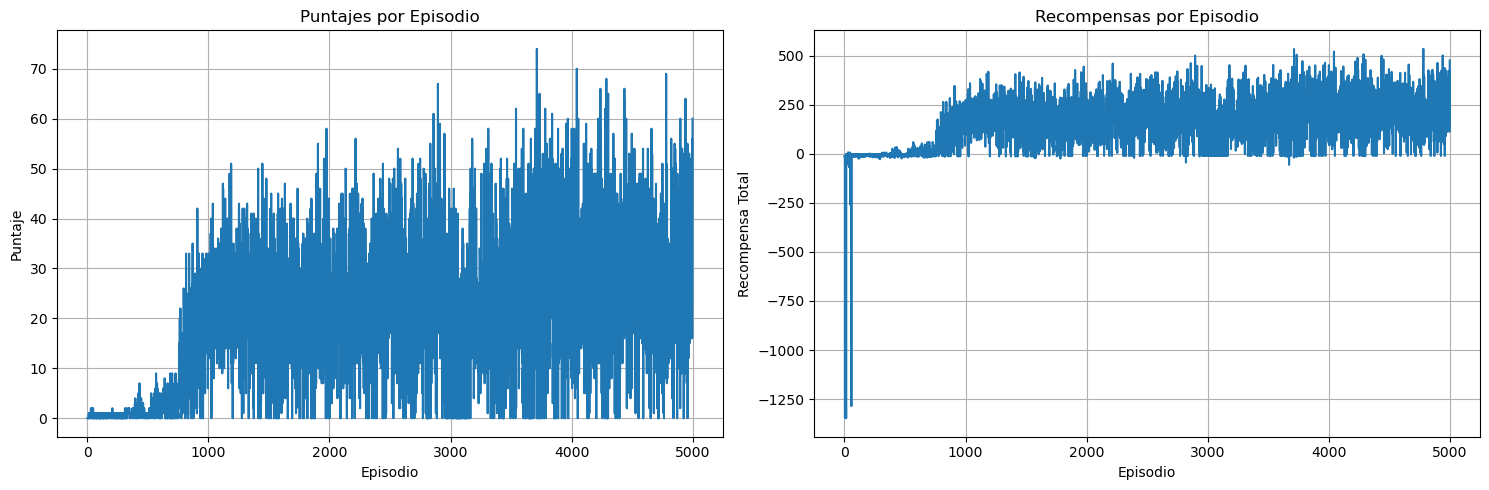

Puntaje promedio en últimos 100 episodios: 31.67
Recompensa promedio en últimos 100 episodios: 242.22


In [4]:
# Visualización de resultados
plt.figure(figsize=(15, 5))

# Subplot para puntajes
plt.subplot(1, 2, 1)
plt.plot(scores)
plt.title('Puntajes por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Puntaje')
plt.grid(True)

# Subplot para recompensas
plt.subplot(1, 2, 2)
plt.plot(rewards_history)
plt.title('Recompensas por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.grid(True)

plt.tight_layout()
plt.show()

# Estadísticas finales
print(f"Puntaje promedio en últimos 100 episodios: {np.mean(scores[-100:]):.2f}")
print(f"Recompensa promedio en últimos 100 episodios: {np.mean(rewards_history[-100:]):.2f}")

In [5]:
# Demostración del agente entrenado
def play_trained_agent():
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        pygame.event.pump()
        # Usar la política aprendida (sin exploración)
        action = np.argmax(Q.get(state, np.zeros(len(env.actions))))
        state, reward, done = env.step(action)
        total_reward += reward
        env.render()
        pygame.time.delay(100)
    
    pygame.quit()
    return total_reward, env.score

# Ejecutar demostración
reward, score = play_trained_agent()
print(f"Demostración finalizada - Puntaje: {score}, Recompensa total: {reward}")

Demostración finalizada - Puntaje: 14, Recompensa total: 106.00000000000067
